In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM,Dense,Bidirectional

import nltk
import re
from nltk.corpus import stopwords

In [2]:
train = pd.read_csv('../input/fake-news/train.csv')
test = pd.read_csv('../input/fake-news/test.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
train.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
train = train.dropna()

In [7]:
train.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
test.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [9]:
test = test.dropna()

In [10]:
test.isna().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [11]:
X = train.drop('label',axis=1)
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [12]:
y = train['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

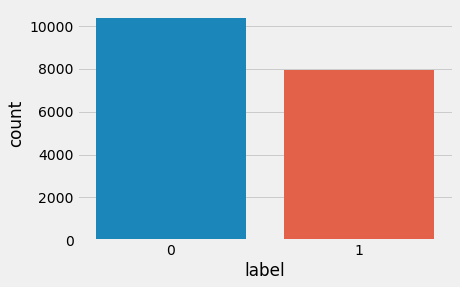

In [13]:
plt.style.use('fivethirtyeight')
sns.countplot(data=train,x='label')

In [14]:
X.shape

(18285, 4)

In [16]:
voc_size = 5000

In [17]:
messages = X.copy()

In [18]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [19]:
messages.reset_index(inplace=True)

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
lm = WordNetLemmatizer()

In [25]:
corpus = []

for i in range(0,len(messages)):
    review = re.sub('^[a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lm.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [43]:
test_data = test.copy()

In [44]:
test_data.reset_index(inplace=True)

In [48]:
test_data['title'][1]

'#NoDAPL: Native American Leaders Vow to Stay All Winter, File Lawsuit Against Police'

In [52]:
test_corpus = []

for i in range(0,len(test_data)):
    review = re.sub('^[a-zA-Z]',' ',test_data['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lm.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    test_corpus.append(review)

In [53]:
test_corpus

['pecter trump loosens tongues, purse strings, silicon valley - new york time',
 '#nodapl: native american leader vow stay winter, file lawsuit police',
 'im tebow attempt another comeback, time baseball - new york time',
 'eiser report: meme war (e995)',
 'elosi call fbi investigation find ’what russian donald trump’ - breitbart',
 'eekly featured profile – randy shannon',
 '184 u.s. general admiral endorse trump commander-in-chief',
 '“working class hero” john brennon',
 'rise mandatory vaccination mean end medical freedom',
 'ommunists terrorize small business',
 'omputer programmer come forward, admits paid rig voting booths! trump right! • usa newsflash',
 'hieves take chunk change, 221 pound it, berlin museum - new york time',
 'ew england patriots’ owner, still sore n.f.l., payback sight - new york time',
 'ollege republicans, yaf sue berkeley ann coulter event - breitbart',
 'rump melt accuses u postal service stealing election clinton',
 'isiting madagascar? leave red swimsuit

In [26]:
corpus

['ouse dem aide: didn’t even see comey’s letter jason chaffetz tweeted',
 'lynn: hillary clinton, big woman campus - breitbart',
 'hy truth might get fired',
 '15 civilian killed single u airstrike identified',
 'ranian woman jailed fictional unpublished story woman stoned death adultery',
 'ackie mason: hollywood would love trump bombed north korea lack trans bathroom (exclusive video) - breitbart',
 'enoît hamon win french socialist party’s presidential nomination - new york time',
 'back-channel plan ukraine russia, courtesy trump associate - new york time',
 'bama’s organizing action partner soros-linked ‘indivisible’ disrupt trump’s agenda',
 'bc comedy sketch "real housewife isis" cause outrage',
 'ussian researcher discover secret nazi military base ‘treasure hunter’ arctic [photos]',
 'official see link trump russia',
 'e: yes, paid government troll social media, blogs, forum website',
 'n major league soccer, argentine find home success - new york time',
 'ell fargo chief abru

In [54]:
onehot_test_rep = [one_hot(words,voc_size) for words in test_corpus]
onehot_test_rep

[[4126, 632, 947, 4033, 2438, 2721, 4416, 2743, 4815, 4215, 4273],
 [554, 3402, 3879, 3441, 4555, 4547, 981, 1548, 36, 4584],
 [2255, 2580, 702, 2424, 6, 4273, 211, 4815, 4215, 4273],
 [2005, 4201, 1774, 4388, 1948],
 [1177, 121, 926, 1050, 2703, 4514, 2037, 1255, 1200, 4774],
 [2909, 4962, 686, 2055, 1704, 2232],
 [3793, 4217, 2356, 1165, 1315, 1957, 632, 1993, 2832, 4774],
 [772, 3615, 4163, 2886, 2978],
 [999, 903, 1764, 2459, 1731, 3172, 1721],
 [2374, 3263, 1712, 4129],
 [3850,
  3828,
  279,
  1719,
  1974,
  346,
  4750,
  874,
  555,
  632,
  2720,
  4273,
  4375,
  1508],
 [3566, 971, 2883, 124, 321, 1586, 2408, 4248, 258, 4815, 4215, 4273],
 [1566,
  1120,
  2074,
  937,
  1431,
  2729,
  2391,
  3369,
  4448,
  2998,
  1706,
  4815,
  4215,
  4273],
 [3929, 2847, 2716, 4468, 4242, 1, 616, 3047, 4774],
 [3496, 3452, 976, 4217, 2643, 2462, 2313, 4736, 2931],
 [4136, 679, 1773, 2577, 1072, 1996, 1535, 2515, 1923, 4815, 4215, 4273],
 [1751, 1792, 4887, 4314, 2055, 2080, 4021, 48

In [27]:
onehot_rep = [one_hot(words,voc_size) for words in corpus]
onehot_rep

[[2638, 2444, 848, 1641, 2429, 3156, 4629, 966, 3378, 140, 168],
 [3057, 4118, 2931, 1229, 2829, 2352, 4774],
 [4931, 2116, 1898, 1727, 4915],
 [4094, 475, 1941, 2312, 4217, 1829, 403],
 [4053, 2829, 1718, 489, 783, 3223, 2829, 3198, 3766, 393],
 [1563,
  2870,
  357,
  249,
  335,
  632,
  2749,
  1887,
  2279,
  2073,
  2678,
  1136,
  1577,
  74,
  4774],
 [4846, 4422, 1782, 831, 2923, 3690, 4383, 558, 4815, 4215, 4273],
 [2173, 1693, 476, 4096, 2139, 1148, 632, 3862, 4815, 4215, 4273],
 [834, 4601, 2432, 1942, 2909, 837, 737, 3866, 2093, 1358],
 [1433, 764, 3962, 2510, 677, 672, 2610, 1552],
 [2709, 2234, 4950, 2025, 4526, 3877, 4097, 4113, 4019, 4444, 2481],
 [3590, 3156, 3757, 632, 2139],
 [1504, 1936, 346, 2547, 1994, 2243, 4423, 1976, 1063, 229],
 [2391, 2310, 3751, 3690, 1733, 2703, 1923, 4246, 4815, 4215, 4273],
 [1658, 2691, 4774, 86, 3585, 4815, 4215, 4273],
 [711, 3823, 3705, 1386, 2418, 2498, 2563, 4259, 1288, 477, 2251, 3952],
 [2154, 34, 4118],
 [1047, 4497, 3942, 1255,

In [55]:
sent_length = 25
embedded_test_docs = pad_sequences(onehot_test_rep,padding='pre',maxlen=sent_length)
print(embedded_test_docs)

[[   0    0    0 ... 4815 4215 4273]
 [   0    0    0 ... 1548   36 4584]
 [   0    0    0 ... 4815 4215 4273]
 ...
 [   0    0    0 ... 4815 4215 4273]
 [   0    0    0 ... 4815 4215 4273]
 [   0    0    0 ... 4815 4215 4273]]


In [28]:
sent_length = 25
embedded_docs = pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3378  140  168]
 [   0    0    0 ... 2829 2352 4774]
 [   0    0    0 ... 1898 1727 4915]
 ...
 [   0    0    0 ... 4815 4215 4273]
 [   0    0    0 ... 3898  568 4731]
 [   0    0    0 ... 3369 3310 2115]]


In [29]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 2638, 2444,  848, 1641, 2429, 3156, 4629,  966,
       3378,  140,  168], dtype=int32)

In [30]:
embedded_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedded_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 40)            200000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [31]:
len(embedded_docs),y.shape

(18285, (18285,))

In [57]:
X_test_final = np.array(embedded_test_docs)

In [32]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [33]:
X_final.shape,y_final.shape

((18285, 25), (18285,))

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.3,random_state=42)

In [36]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=20)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 12799 samples, validate on 5486 samples
Epoch 1/20
12799/12799 [==============================] - 11s 823us/step - loss: 0.3316 - accuracy: 0.8438 - val_loss: 0.2167 - val_accuracy: 0.9103
Epoch 2/20
12799/12799 [==============================] - 9s 706us/step - loss: 0.1446 - accuracy: 0.9448 - val_loss: 0.2249 - val_accuracy: 0.9129
Epoch 3/20
12799/12799 [==============================] - 9s 712us/step - loss: 0.0901 - accuracy: 0.9699 - val_loss: 0.2519 - val_accuracy: 0.9090
Epoch 4/20
12799/12799 [==============================] - 9s 722us/step - loss: 0.0546 - accuracy: 0.9841 - val_loss: 0.3266 - val_accuracy: 0.9063
Epoch 5/20
12799/12799 [==============================] - 9s 733us/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.3622 - val_accuracy: 0.9036
Epoch 6/20
12799/12799 [==============================] - 9s 741us/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.4032 - val_accuracy: 0.8997
Epoch 7/20
12799/12799 [==============================] - 9s 7

In [58]:
y_pred = model.predict_classes(X_test_final)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [64]:
y_pred = np.array(y_pred)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)